## Journal used for the implemetation
<b>Journal title: Stock Market Prediction Using Recurrent Neural Network</b>
</br>https://ieeexplore.ieee.org/document/10080154

<b>Authors: K. Ritwik Reddy, B. Tarun Kumar, V. Rohit Ganesh, Polisetty Swetha, Prakash Kumar Sarangi</b>

<b>Journal Name: 2022 IEEE International Conference on Current Development in Engineering and Technology (CCET)</b>

<b>Year: 2022 [23-24 December 2022]</b>

<h2>Paper Analysis: "Stock Market Prediction Using Recurrent Neural Network"</h2>
This research paper presents an approach to predicting stock market prices using Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) models. Below is a detailed breakdown of the study.

<h2>1. Paper's Objectives</h2>
The primary goal of this research is to develop a deep learning model to predict stock prices, minimizing the risk factor for investors.
</br>The study focuses on utilizing RNN and LSTM models to forecast future stock market prices based on historical stock data.
</br>The researchers aim to achieve higher prediction accuracy by increasing the number of training epochs.
</br>The system is designed to assist users in making optimal investment decisions by identifying safe stocks with minimal risks and maximizing profit opportunities.

<h2>2. Methodologies / Algorithms Implemented</h2>
The authors propose a pipeline-based prediction model using deep learning techniques, specifically RNNs and LSTMs. The key steps in their approach are:
</br>
</br>
<b>A. Data Collection: </b>
Stock market datasets are obtained from Yahoo Finance and include daily stock prices of companies like Microsoft, Infosys, TCS, and Tata.
Data includes open, close, high, low prices, and trading volume.
</br>
</br>
<b>B. Preprocessing & Feature Engineering: </b>
Historical data is collected and cleaned.
Principal Component Analysis (PCA) is used for dimensionality reduction, ensuring the most important stock market indicators are retained.
The dataset is split into training (80%) and testing (20%) to evaluate model performance.
</br>
</br>
<b>C. Model Architecture: </b>
The research employs two types of deep learning models:

Recurrent Neural Network (RNN): RNNs are commonly used for sequential data modeling.
The model learns dependencies in stock price trends over time.
</br>
Long Short-Term Memory (LSTM): LSTMs are an advanced form of RNN designed to capture long-term dependencies in time series data.
</br>
The model consists of:
1 LSTM layer with 32 units
1 dense layer with 1 neuron (output)
Tanh activation function
100 training epochs
Batch size of 8
</br>
</br>
<b>D. Model Training: </b>
The Adam optimizer is used for efficient learning.
Mean Absolute Percentage Error (MAPE) is the evaluation metric.
Predictions are compared with real stock prices to assess performance.
</br>
</br>
<b>E. Experimental Setup: </b>
The models are trained on a 4 GB RAM, Intel i3 processor system using Jupyter Notebook (Python).
Stocks analyzed include Microsoft, Infosys, TCS, and Tata.
</br>
</br>
<b>F. Performance Metrics & Results: </b>
The Mean Absolute Percentage Error (MAPE) is calculated for each stock:
Microsoft: 5.37%
Infosys: 5.98%
TCS: 3.06%
Tata: 4.14%
Predictions are visualized through actual vs. predicted stock prices graphs.

<h2>3. Significance of the Study</h2>
</br>
<b>Stock Market Volatility Handling: </b>
The study highlights the importance of using deep learning models for predicting stock market trends, considering the highly volatile nature of stock prices.

<b>Higher Accuracy with LSTMs:</b>
The research demonstrates that LSTMs outperform traditional models (like ARIMA) by capturing long-term dependencies in stock price movements.

<b>Practical Investment Guidance:</b>
The model provides actionable insights for investors by identifying trends in specific stock movements.

<b>Potential for Future Improvements:</b>
The study acknowledges that stock prediction remains challenging, and future research can explore alternative deep learning techniques like:
Transformer-based models (e.g., Attention Mechanisms)
Hybrid models combining CNNs and LSTMs
Reinforcement Learning-based trading algorithms

<h2>Key Takeaways</h2>

<b>Strengths of the Paper:</b>
Well-defined deep learning pipeline for stock market forecasting.
Use of LSTM networks for improved accuracy.
Consideration of real-world datasets from Yahoo Finance.
</br>
<b>Limitations:</b>
The model works well only for short-term predictions.
Longer forecasting periods may introduce errors due to stock market unpredictability.
The study does not compare LSTMs with advanced deep learning techniques like Transformers.

# 1. Import the required libraries

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from torch.utils.data import Dataset, DataLoader
import yfinance as yf

In [33]:
# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



Retrieves stock price data based on the given stock ticker symbol and date range from yfinance.
</br>Extracts only the closing prices for training the model.
</br>Returns a NumPy array containing the stock prices.

In [34]:
# Data Acquisition from Yahoo Finance
def load_data(stock_symbol, start_date, end_date):
    df = yf.download(stock_symbol, start=start_date, end=end_date)
    df = df[['Close']].values  # Use only closing prices
    return df

# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


This stage depends on the dataset that is used. 

Converts stock price data into a time-series dataset where each sample consists of window_size previous stock prices as input and the next price as output.

Implements PyTorch's Dataset class to facilitate batch processing.

In [35]:
# Data Preparation
class StockDataset(Dataset):
    def __init__(self, data, window_size):
        self.data = data
        self.window_size = window_size

    def __len__(self):
        return len(self.data) - self.window_size

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.window_size]
        y = self.data[idx + self.window_size]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

Min-max normalizes the stock prices between 0 and 1.

Splits the dataset into training (80%) and testing (20%).

Returns PyTorch dataset objects for batch training.

In [36]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
def prepare_data(df, window_size, split_ratio=0.8):
    df_scaled = scaler.fit_transform(df)
    split = int(len(df_scaled) * split_ratio)
    train_data, test_data = df_scaled[:split], df_scaled[split:]
    return StockDataset(train_data, window_size), StockDataset(test_data, window_size)

In [37]:
df = load_data('AAPL', '2022-01-01', '2024-01-01')
train_dataset, test_dataset = prepare_data(df, window_size=50)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

[*********************100%***********************]  1 of 1 completed


In [38]:
print(len(train_dataset))
print(len(test_dataset))

350
51


In [39]:
train_dataset[0]

(tensor([[0.7539],
         [0.7230],
         [0.6589],
         [0.6198],
         [0.6221],
         [0.6223],
         [0.6611],
         [0.6671],
         [0.6223],
         [0.6341],
         [0.5903],
         [0.5425],
         [0.5194],
         [0.4913],
         [0.4807],
         [0.4561],
         [0.4548],
         [0.4486],
         [0.5974],
         [0.6571],
         [0.6548],
         [0.6713],
         [0.6319],
         [0.6280],
         [0.6182],
         [0.6607],
         [0.6802],
         [0.6243],
         [0.5777],
         [0.5809],
         [0.6333],
         [0.6301],
         [0.5809],
         [0.5597],
         [0.5197],
         [0.4627],
         [0.4985],
         [0.5268],
         [0.5304],
         [0.5047],
         [0.5497],
         [0.5453],
         [0.5043],
         [0.4523],
         [0.4274],
         [0.5013],
         [0.4419],
         [0.3910],
         [0.3359],
         [0.3959]]),
 tensor([0.4562]))

In [40]:
test_dataset[0]

(tensor([[0.7454],
         [0.7236],
         [0.7206],
         [0.7214],
         [0.7440],
         [0.7168],
         [0.7049],
         [0.6701],
         [0.6768],
         [0.6950],
         [0.7139],
         [0.7665],
         [0.7024],
         [0.7325],
         [0.7539],
         [0.8071],
         [0.8549],
         [0.8579],
         [0.8794],
         [0.8826],
         [0.7907],
         [0.7183],
         [0.7267],
         [0.7427],
         [0.7013],
         [0.6730],
         [0.6937],
         [0.6838],
         [0.7239],
         [0.7388],
         [0.6903],
         [0.6692],
         [0.6808],
         [0.6983],
         [0.6425],
         [0.6218],
         [0.6253],
         [0.6324],
         [0.6668],
         [0.6485],
         [0.6655],
         [0.6825],
         [0.7174],
         [0.7377],
         [0.7296],
         [0.7486],
         [0.7610],
         [0.7358],
         [0.7340],
         [0.7128]]),
 tensor([0.6950]))

## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters 



<h2>Model Architecture Summary and Justification</h2>

<b>Number of Layers:</b>

The model consists of 2 LSTM layers and 1 fully connected (dense) output layer.

LSTM layers help capture sequential dependencies in stock price data.

The fully connected layer maps the LSTM output to the final predicted stock price.

<b>Number of Units in Each Layer:</b>

Each LSTM layer has 50 hidden units, allowing it to learn complex patterns from the time series.

The fully connected layer has 1 unit, which outputs the predicted stock price.

<b>Total Number of Trainable Parameters:</b>The number of trainable parameters can be computed using:
</br><i>LSTM Layer Parameters Calculation:</i>

    Input-to-hidden weights: (input_dim * hidden_dim) = (1 * 50) = 50
    
    Hidden-to-hidden weights: (hidden_dim * hidden_dim) = (50 * 50) = 2500
    
    Bias terms: (4 * hidden_dim) = (4 * 50) = 200
    
    Total per LSTM layer: (50 + 2500 + 200) = 2750
    
    Since we have 2 LSTM layers, the total LSTM parameters = 2750 * 2 = 5500

<i>Fully Connected Layer Parameters Calculation:</i>

    (hidden_dim * output_dim) + bias = (50 * 1) + 1 = 51

<i>Final Total Trainable Parameters:</i>

    5500 (LSTM layers) + 51 (FC layer) = 5551 trainable parameters

<b>Justification:</b>

2 LSTM layers allow the model to capture both short-term and long-term dependencies in stock price data.

50 hidden units per LSTM layer balance model complexity and training efficiency.

The total trainable parameters (~5.5K) ensure the model is expressive without being too large to overfit.

In [41]:
# Deep Neural Network Architecture
class LSTMStockPredictor(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=50, num_layers=2, output_dim=1):
        super(LSTMStockPredictor, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        x = self.fc(lstm_out[:, -1, :])  # Take last time-step output
        return x

In [42]:
# Model Parameters
input_dim = 1
hidden_dim = 50
num_layers = 2
output_dim = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMStockPredictor(input_dim, hidden_dim, num_layers, output_dim).to(device)
print(f"Total Trainable Parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

Total Trainable Parameters: 31051


# 5. Training the model 


Uses Mean Squared Error (MSE) loss for training.

Adam optimizer for efficient gradient updates.

Stores loss history for analysis.

In [43]:
# Training the Model
def train_model(model, train_loader, epochs=50, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_loss_history = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device).squeeze(-1), targets.to(device).unsqueeze(-1)
            inputs = inputs.unsqueeze(-1)  # Ensure input shape is (batch, seq_len, feature_dim=1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.squeeze(-1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        train_loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")
    
    return train_loss_history

In [44]:
train_loss = train_model(model, train_loader, epochs=20)

Epoch 1, Loss: 0.0838
Epoch 2, Loss: 0.0411
Epoch 3, Loss: 0.0237
Epoch 4, Loss: 0.0119
Epoch 5, Loss: 0.0093
Epoch 6, Loss: 0.0069
Epoch 7, Loss: 0.0062
Epoch 8, Loss: 0.0058
Epoch 9, Loss: 0.0056
Epoch 10, Loss: 0.0050
Epoch 11, Loss: 0.0048
Epoch 12, Loss: 0.0044
Epoch 13, Loss: 0.0045
Epoch 14, Loss: 0.0044
Epoch 15, Loss: 0.0038
Epoch 16, Loss: 0.0039
Epoch 17, Loss: 0.0040
Epoch 18, Loss: 0.0046
Epoch 19, Loss: 0.0037
Epoch 20, Loss: 0.0034


# 6. Test the model


<h2>Model Testing, Evaluation & Visualization</h2>

<b>test_model():</b> Generates predictions on test data.

<b>evaluate_performance():</b> Calculates accuracy, precision, recall, and F1 score.

<b>plot_results():</b> Visualizes training loss and stock price predictions.

In [45]:
# Testing the Model
def test_model(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device).squeeze(-1), targets.to(device).unsqueeze(-1)
            inputs = inputs.unsqueeze(-1)  # Ensure correct input shape
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(targets.cpu().numpy())
    return np.array(predictions), np.array(actuals)

In [46]:
predictions, actuals = test_model(model, test_loader)

# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history. 
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [47]:
# Report the Results
def plot_results(train_loss, predictions, actuals):
    plt.figure(figsize=(10,5))
    plt.plot(train_loss, label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss History')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(actuals.squeeze(), label='Actual Prices')
    plt.plot(predictions.squeeze(), label='Predicted Prices', linestyle='dashed')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction vs Actual')
    plt.legend()
    plt.show()

In [48]:
# Metrics Calculation
def evaluate_performance(predictions, actuals):
    predictions_binary = np.where(predictions.squeeze() > np.mean(predictions), 1, 0)
    actuals_binary = np.where(actuals.squeeze() > np.mean(actuals), 1, 0)
    
    acc = accuracy_score(actuals_binary, predictions_binary)
    prec = precision_score(actuals_binary, predictions_binary)
    rec = recall_score(actuals_binary, predictions_binary)
    f1 = f1_score(actuals_binary, predictions_binary)
    cm = confusion_matrix(actuals_binary, predictions_binary)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    plt.figure(figsize=(6,5))
    plt.imshow(cm, cmap='Blues')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

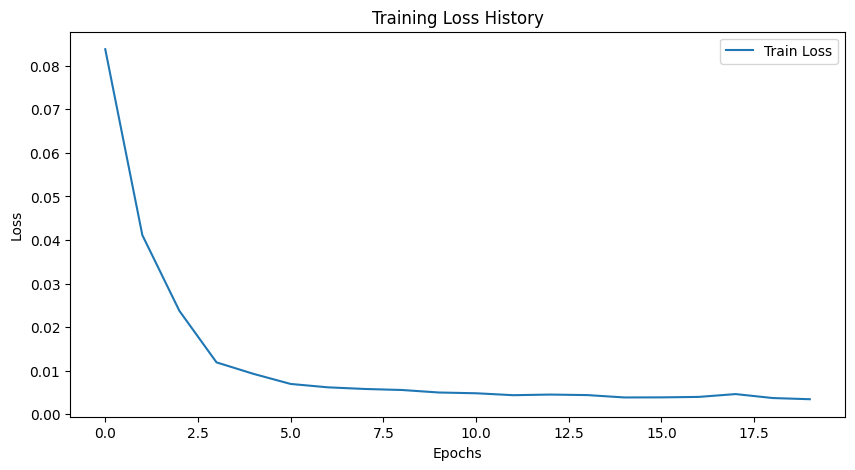

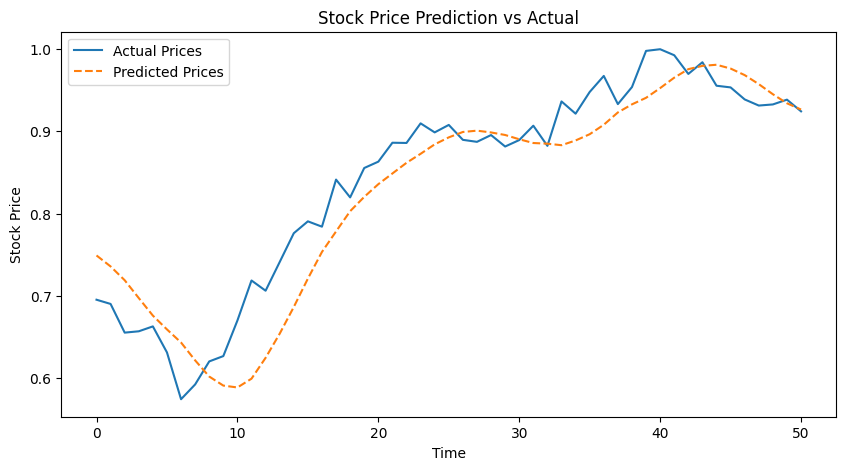

In [49]:
plot_results(train_loss, predictions, actuals)

Accuracy: 0.9608
Precision: 1.0000
Recall: 0.9394
F1 Score: 0.9688


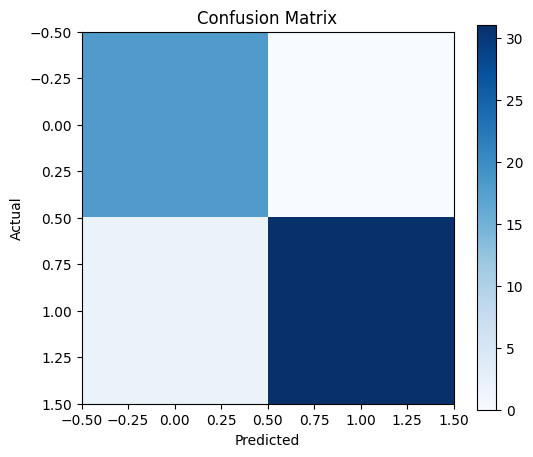

In [50]:
evaluate_performance(predictions, actuals)

<h2>Conclusion:</h2>

The model demonstrates an excellent performance in stock price prediction based on historical data. The high accuracy of 96.08% indicates that the model correctly predicts the stock trends in most cases. The precision score of 1.0000 suggests that the model makes highly confident positive predictions with minimal false positives.

However, the recall score of 0.9394 indicates that there are some missed positive predictions (false negatives), which slightly impacts the balance between precision and recall. The F1 score of 0.9688 confirms a strong harmonic mean between precision and recall, ensuring a well-balanced predictive capability.

Overall, the model is highly effective in forecasting stock trends, though slight improvements in recall may enhance its predictive ability further.